##Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report

##Import Train and Test Dataset

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download d4rklucif3r/cat-and-dogs

 98% 214M/218M [00:01<00:00, 151MB/s]
100% 218M/218M [00:01<00:00, 127MB/s]


In [ ]:
! unzip cat-and-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/cats/cat.37.jpg  
  inflating: dataset/training_set/cats/cat.370.jpg  
  inflating: dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/c

In [ ]:
#ImageDataGenerator for data augmentation and rescaling (Preprocessing)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../content/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../content/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


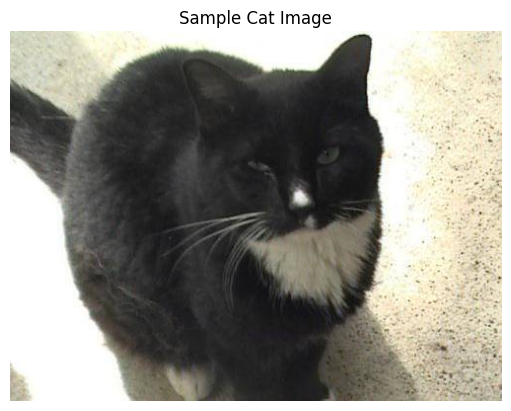

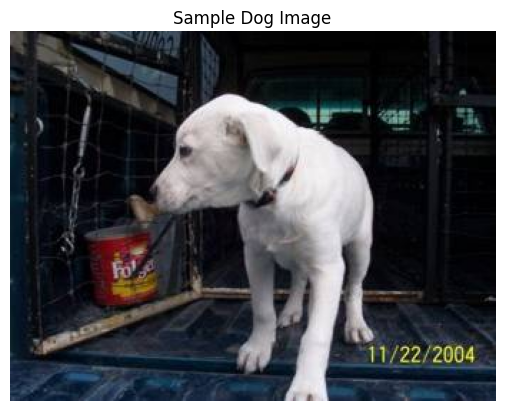

In [ ]:
train_path = '../content/dataset/training_set'
test_path = '../content/dataset/test_set'

img=load_img(train_path + "/cats/cat.374.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Cat Image")
plt.show()

plt.figure()

img=load_img(train_path + "/dogs/dog.154.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Dog Image")
plt.show()

In [ ]:
train_shapes = []
test_shapes = []

train_images, _ = next(training_set)
test_images, _ = next(test_set)

train_shapes.append(train_images.shape[1:])
test_shapes.append(test_images.shape[1:])

print("Shape of train images:", train_shapes)
print("Shape of test images:", test_shapes)

Shape of train images: [(64, 64, 3)]
Shape of test images: [(64, 64, 3)]


##Data Visualization

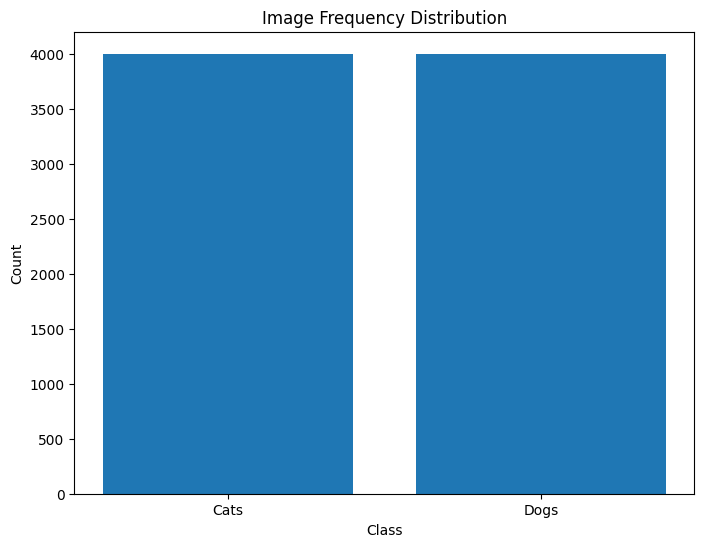

In [ ]:
class_labels = ['Cats', 'Dogs']
image_counts = [4000, 4000]

plt.figure(figsize=(8, 6))
plt.bar(class_labels, image_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Image Frequency Distribution')
plt.show()

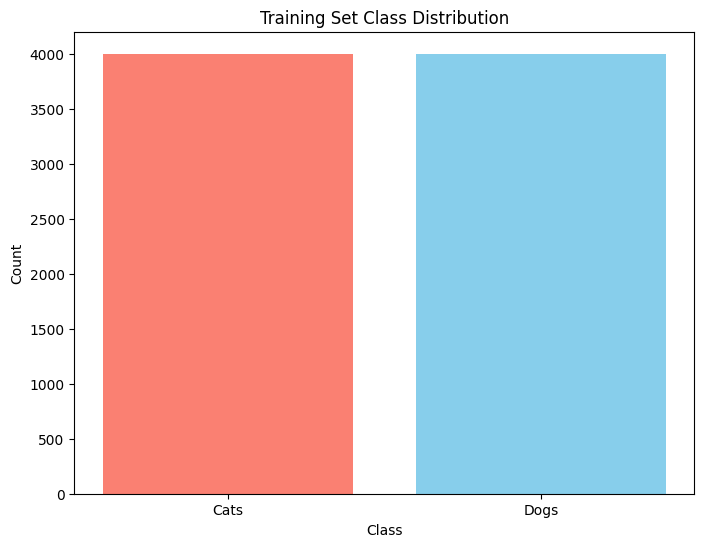

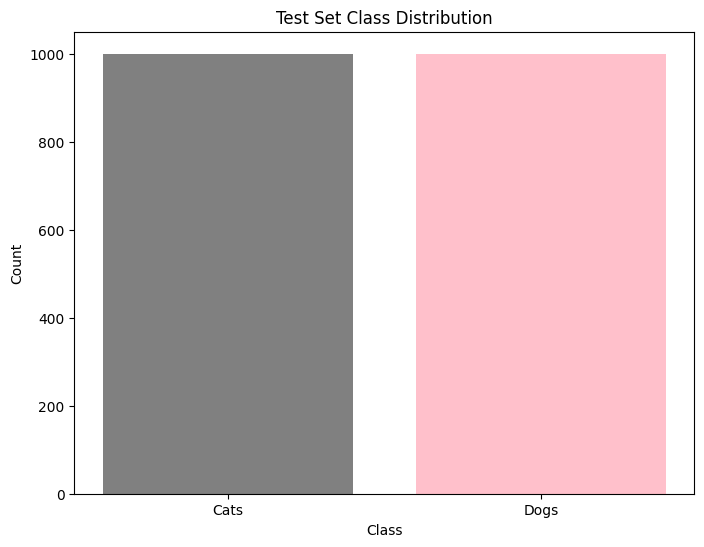

In [ ]:
cat_path = train_path+"/cats"
dog_path = train_path+"/dogs"
cat_count = len(os.listdir(cat_path))
dog_count = len(os.listdir(dog_path))

cat_path2 = test_path+"/cats"
dog_path2 = test_path+"/dogs"
cat_count2 = len(os.listdir(cat_path2))
dog_count2 = len(os.listdir(dog_path2))

class_names_train = ['Cats', 'Dogs']
counts_train = [cat_count, dog_count]

plt.figure(figsize=(8, 6))
plt.bar(class_names_train, counts_train, color=['salmon', 'skyblue'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')
plt.show()

class_names_test = ['Cats', 'Dogs']
counts_test = [cat_count2, dog_count2]

plt.figure(figsize=(8, 6))
plt.bar(class_names_test, counts_test, color=['grey', 'pink'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Test Set Class Distribution')
plt.show()

##CNN Model

In [ ]:
model=Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=2, strides=2))
#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
#FLATTEN LAYER
model.add(Flatten())
#FULLY CONNECTED LAYER
model.add(Dense(units=128,activation="relu"))
#OUTPUT LAYER
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 128)               3444864   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

##Train Model

In [ ]:
hist=model.fit(training_set,validation_data=test_set,epochs=20)

Epoch 1/20
250/250 [==============================] - 57s 223ms/step - loss: 0.7026 - accuracy: 0.5281 - val_loss: 0.6833 - val_accuracy: 0.5530
Epoch 2/20
250/250 [==============================] - 54s 217ms/step - loss: 0.6741 - accuracy: 0.5857 - val_loss: 0.6535 - val_accuracy: 0.6330
Epoch 3/20
250/250 [==============================] - 53s 214ms/step - loss: 0.6476 - accuracy: 0.6283 - val_loss: 0.6159 - val_accuracy: 0.6705
Epoch 4/20
250/250 [==============================] - 53s 212ms/step - loss: 0.6136 - accuracy: 0.6647 - val_loss: 0.5965 - val_accuracy: 0.6825
Epoch 5/20
250/250 [==============================] - 53s 212ms/step - loss: 0.5773 - accuracy: 0.6994 - val_loss: 0.5862 - val_accuracy: 0.6835
Epoch 6/20
250/250 [==============================] - 54s 217ms/step - loss: 0.5563 - accuracy: 0.7116 - val_loss: 0.5623 - val_accuracy: 0.7175
Epoch 7/20
250/250 [==============================] - 58s 232ms/step - loss: 0.5362 - accuracy: 0.7264 - val_loss: 0.5745 - val_ac

##Model Predict

In [ ]:
test_images, test_labels = next(test_set)
predictions = model.predict(test_images)
predicted_labels = np.where(predictions > 0.5, 1, 0)
predictions = []
true_labels = []

# Iterasi melalui seluruh data uji
for i in range(len(test_set)):
    test_images, test_labels = next(test_set)
    predictions_batch = model.predict(test_images)
    predictions.extend(predictions_batch)
    true_labels.extend(test_labels)

# Memproses hasil prediksi
predicted_labels = np.where(np.array(predictions) > 0.5, 1, 0)

1/1 [==============================] - 0s 47ms/step


##Model Evaluation

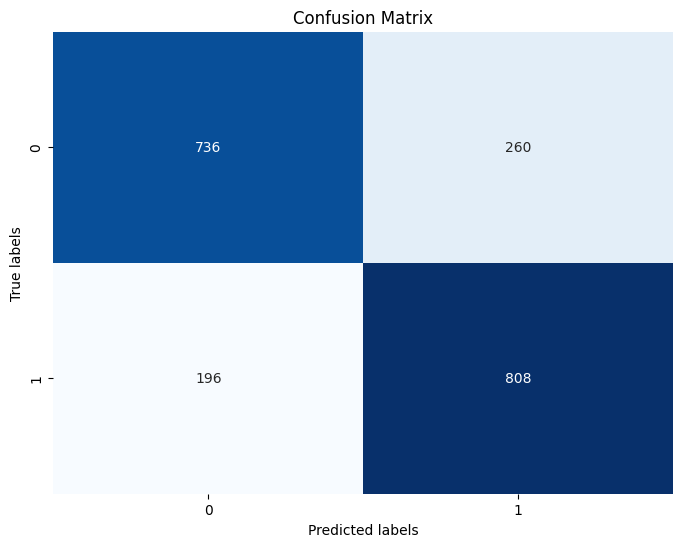

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("The Classification Report on Test Data")
clf_report = classification_report(true_labels, predicted_labels)
print(clf_report)

The Classification Report on Test Data
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       996
         1.0       0.76      0.80      0.78      1004

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



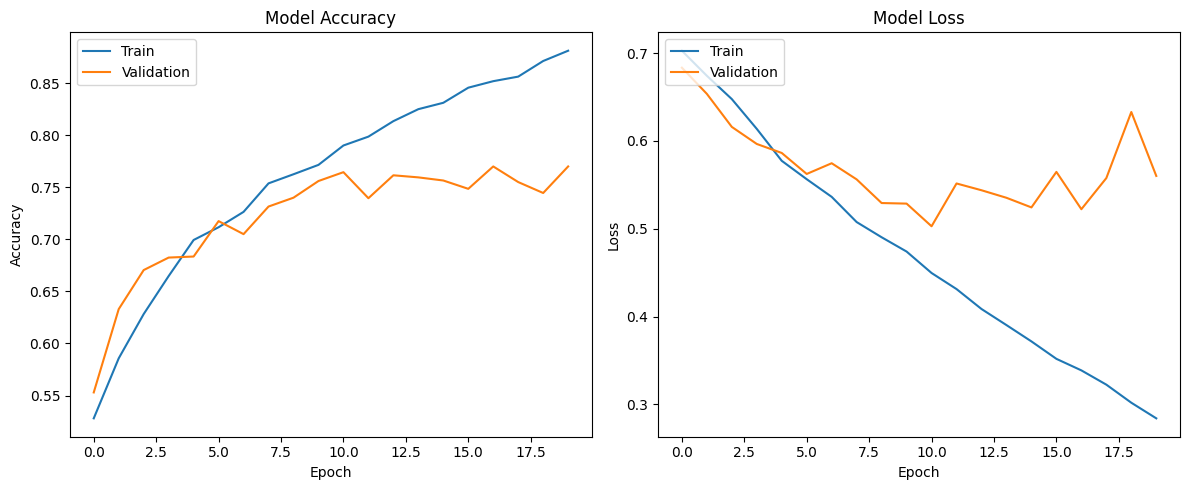

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

##Single Prediction

1/1 [==============================] - 0s 44ms/step


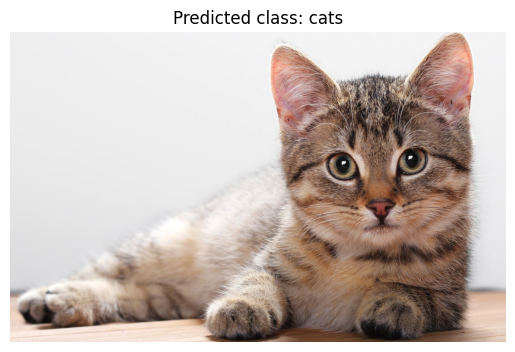

In [ ]:
img_path = "../content/dataset/single_prediction/cat_or_dog_2.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img2 = image.load_img(img_path)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

label = os.path.dirname(img_path)

predictions = model.predict(img_array)

predicted_labels = np.where(predictions > 0.5, 1, 0)
if predicted_labels <= 0.5:
    predicted_class = "cats"
else:
    predicted_class = "dogs"

plt.imshow(img2)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()
